<a href="https://colab.research.google.com/github/Vakhranev/MGIMO/blob/main/28%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование взаимосвязей между переменными

**Статистические тесты Python**

Как обычно, сначала импортируем все необходимое:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

Допустим, изначально показатели выглядят вот так:

148fc2b253952e2994d7a369321c13dd.svg

По прошествии эксперимента руководитель снова посчитал метрики и увидел вот такие цифры:

2ef3a1e2c921ee1c0773552e277b2276.svg

Если интересны случаи, когда незнание или неправильное понимание статистики и теории вероятностей очень сильно вредило людям, то можно почитать следующие книги:

* "Голая статистика" Чарльза Уилана;

* "Как лгать при помощи статистики" Дарелла Хаффа;

* "Парадоксы в теории вероятностей и математической статистике" Габора Секея.

В этом случае лучше всего воспользоваться эмпирической функцией распределения вероятностей:

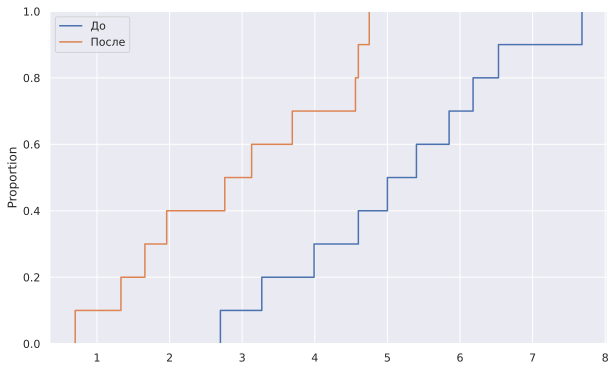

In [2]:
x1 = np.array([7.68,5.40,3.99,3.27,2.70,5.85,6.53,5.00,4.60,6.18])
x2 = np.array([1.33,1.66,2.76,4.56,4.75,0.70,3.13,1.96,4.60,3.69])

fig, ax = plt.subplots()
sns.ecdfplot(x=x1, ax=ax, label='До ')
sns.ecdfplot(x=x2, ax=ax, label='После')
ax.legend()

Распределение сместилось влево, хотя это вовсе не значит, что все работники показали улучшение результата (определенный индекс соответствует определенному работнику), это можно заметить по значениям метрик, или лучше нарисовать вот такой график:

<BarContainer object of 10 artists>

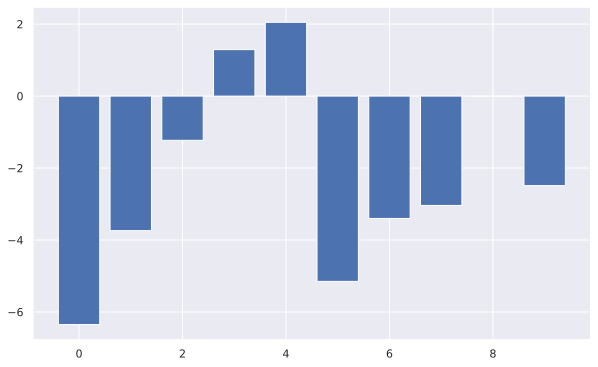

In [3]:
plt.bar(np.arange(10), (x2-x1))

Можно попробовать выкрутиться, просто добавив поясняющий заголовок:

Text(0, 0.5, 'Дельта')

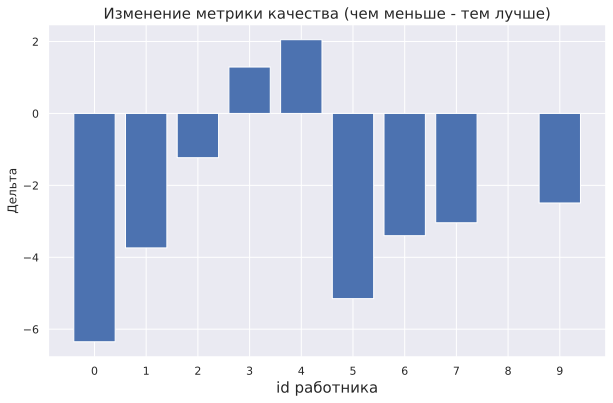

In [4]:
plt.bar(np.arange(10), (x2-x1))
plt.xticks(np.arange(10));
plt.title('Изменение метрики качества (чем меньше - тем лучше)',
          fontsize=15)
plt.xlabel('id работника', fontsize=15)
plt.ylabel('Дельта')

Хотя руководитель может отобразить результаты и так:

Text(0, 0.5, 'Дельта')

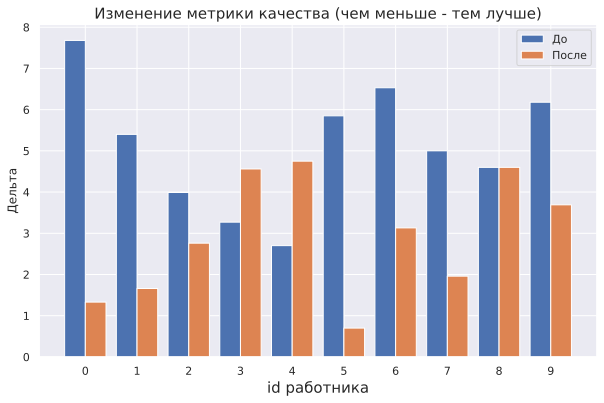

In [5]:
plt.bar(np.arange(10) - 0.2, x1, width=0.4, label='До')
plt.bar(np.arange(10) + 0.2, x2, width=0.4, label='После')
plt.xticks(np.arange(10))
plt.legend()
plt.title('Изменение метрики качества (чем меньше - тем лучше)',
          fontsize=15)
plt.xlabel('id работника', fontsize=15)
plt.ylabel('Дельта')

Первое, что приходит в голову - выполнить t-тест Стьюдента для зависимых выборок:

In [6]:
stats.ttest_rel(x2, x1)

TtestResult(statistic=-2.5653968678354184, pvalue=0.03041662395965993, df=9)

На уровне значимости *α*=0.05 c p-value равным 0.03 можно сделать вывод о том, что результат оказался статистически значимым.

У нас есть две выборки со следующими статистиками:

In [7]:
print(f'mean(x1) = {x1.mean():.3}')
print(f'mean(x2) = {x2.mean():.3}')
print('-'*15)
print(f'std(x1) = {x1.std(ddof=1):.3}')
print(f'std(x2) = {x2.std(ddof=1):.3}')

mean(x1) = 5.12
mean(x2) = 2.91
---------------
std(x1) = 1.53
std(x2) = 1.47


Для того, чтобы посмотреть на то, как будут распределены выборочные дисперсии двух генеральных совокупностей, сгенерируем по 5000 выборок из распределений *N*(5, 1.5^2) и *N*(3, 1.5^2) по 10 элементов в каждой выборке, затем вычислим выборочную дисперсию для каждой из них:

<Axes: ylabel='Count'>

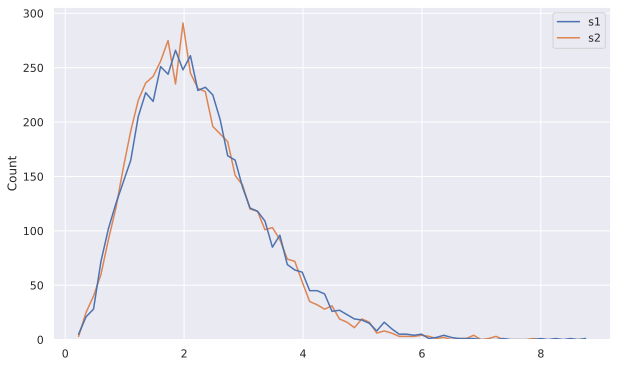

In [8]:
samples = stats.norm.rvs(loc=(5, 3), scale=1.5, size=(5000, 10, 2))
deviations = samples.var(axis=1, ddof=1)
deviations_df = pd.DataFrame(deviations, columns=['s1', 's2'])

sns.histplot(data=deviations_df, element="poly", color='r', fill=False)

Иногда бывает так, что абсолютно никому нет дела до вашего кода, - главное результат. Поэтому появляется соблазн генерировать вот такую ерунду:

<Axes: ylabel='Count'>

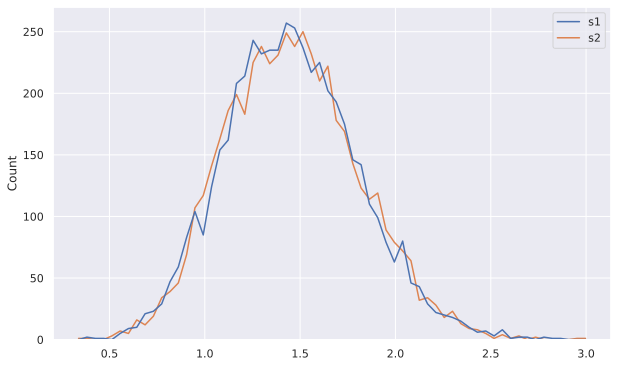

In [9]:
sns.histplot(data=pd.DataFrame(np.std(stats.norm.rvs(loc=(5, 3), scale=1.5, size=(5000,10,2)), axis=1, ddof=1), columns=['s1', 's2']), element="poly", color='r', fill=False)

Если есть хоть какая-то вероятность того, что к этому коду придется вернуться, то лучше оформлять код в более понятном виде:

* простое - разделяется на шаги;

* сложное разделяется на шаги и снабжается комментариями;

* запутанное разбивается на шаги, снабжается комментариями и пояснениями.

Оценить параметры распределения можно с помощью метода максимального правдоподобия, который реализован в методе **fit()**:

In [10]:
df1, loc1, scale1 = stats.chi2.fit(deviations_df['s1'], fdf=10)
print(f'df1 = {df1}, loc1 = {loc1:<8.4}, scale1 = {scale1:.3}')

df2, loc2, scale2 = stats.chi2.fit(deviations_df['s2'], fdf=10)
print(f'df2 = {df2}, loc2 = {loc2:<8.4}, scale1 = {scale2:.3}')

df1 = 10, loc1 = -0.1027 , scale1 = 0.238
df2 = 10, loc2 = -0.08352, scale1 = 0.231


Text(0.5, 0, 's')

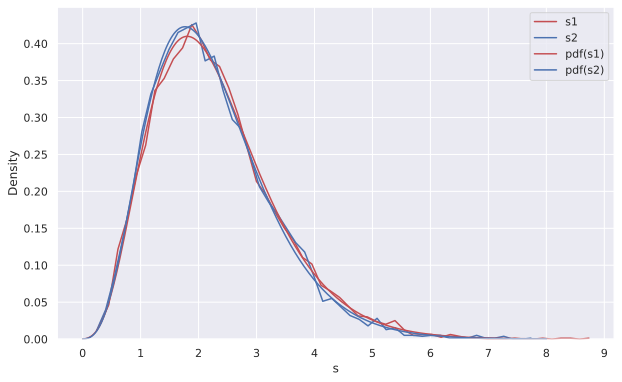

In [11]:
fig, ax = plt.subplots()

# гистограммы придется рисовать по отдельности, иначе
# площадь под каждой из них будет равна 0.5 а не 1:
sns.histplot(data=deviations_df['s1'], color='r', element='poly',
             fill=False, stat='density', label='s1', ax=ax)
sns.histplot(data=deviations_df['s2'], color='b', element='poly',
             fill=False, stat='density', label='s2', ax=ax)


chi2_rv1 = stats.chi2(df1, loc1, scale1)
chi2_rv2 = stats.chi2(df2, loc2, scale2)
x = np.linspace(0, 8, 300)
sns.lineplot(x=x, y=chi2_rv1.pdf(x), color='r', label='pdf(s1)', ax=ax)
sns.lineplot(x=x, y=chi2_rv2.pdf(x), color='b', label='pdf(s2)', ax=ax)
ax.set_xticks(np.arange(10))
ax.set_xlabel('s')

Если вы покопаетесь в [журналах](https://www.jstatsoft.org/index), то с удивлением обнаружите, что математическая статистика проскользнула практически во все разделы математики, что как минимум, занимательно.

У нас есть функции распределения плотности вероятности для выборочных дисперсий, взятых из двух генеральных совокупностей, распределенных как *N*(5, 1.5^2) и *N*(3, 1.5^2).

Допустим, мы извлекли выборку из десяти элементов стандартное отклонение которой равно 2, может ли выборка с таким отклонением быть получена случайно из генеральной совокупности с распределением *N*(5, 1.5^2)?

Text(0.5, 0, 's')

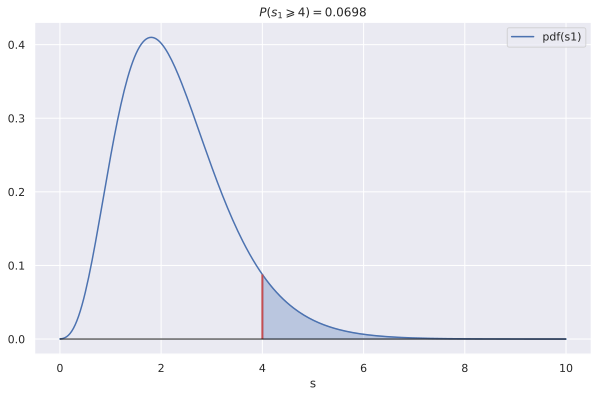

In [12]:
fig, ax = plt.subplots()

var = 2**2
x = np.linspace(0, 10, 300)

sns.lineplot(x=x, y=chi2_rv1.pdf(x), label='pdf(s1)', ax=ax)
ax.vlines(var, 0, chi2_rv1.pdf(var), color='r', lw=2)


ax.fill_between(x[x>var], chi2_rv1.pdf(x[x>var]),
                np.zeros(len(x[x>var])), alpha=0.3, color='b')
ax.hlines(0, x.min(), x.max(), lw=1, color='k')

p = chi2_rv1.sf(var)
ax.set_title(f'$P(s_{1} \geqslant  {var}) = $' + '{:.3}'.format(p))
ax.set_xlabel('s')

Полученное p-value не так уж и велико, а это значит, что получить выборку, состоящую из 10 элементов из генеральной совокупности с распределением *N*(5, 1.5^2) и выборочным стандартным отклонением *s* ≥ 2 не так то уж и просто. Впору засомневаться в том, что отклонение генеральной совокупности *σ* действительно равно 1.5. Однако, если уровень значимости задан как *α*=0.05, то мы все-таки должны признать, что получение выборки с таким отклонением обусловлено случайностью.

С другой стороны, мы всегда можем задать какую-то область, вероятность попадания в которую будет равна заданному значению, например 0.1:

Text(0.5, 0, 's')

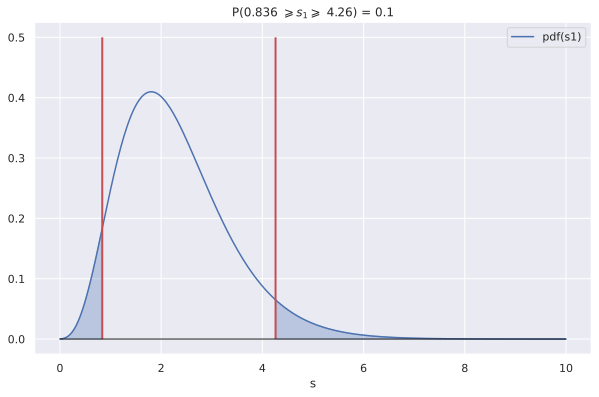

In [13]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 300)
sns.lineplot(x=x, y=chi2_rv1.pdf(x), label='pdf(s1)', ax=ax)

# определяем критические значения:
ci_left, ci_right = chi2_rv1.interval(0.9)
ax.vlines([ci_left, ci_right], 0, 0.5, color='r', lw=2)

x_le_ci_l, x_ge_ci_r = x[x<ci_left], x[x>ci_right]
ax.fill_between(x_le_ci_l, chi2_rv1.pdf(x_le_ci_l),
                np.zeros(len(x_le_ci_l)), alpha=0.3, color='b')
ax.fill_between(x_ge_ci_r, chi2_rv1.pdf(x_ge_ci_r),
                np.zeros(len(x_ge_ci_r)), alpha=0.3, color='b')


ax.set_title(f'P({ci_left:.3} $\geqslant  s_{1} \geqslant$ {ci_right:.3}) = 0.1')


ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.set_xlabel('s')

Если отклонение от вершины распределения превысит указанный диапазон, то с *α*=0.1 мы можем утверждать, что данное отклонение обусловлено какими-то факторами, повлиявшими на генеральную совокупность, но не случайностью.

Давайте взглянем, как распределена величина:

bb0aa6a24dfd6865b867d2bd690b26ad.svg

где *i* это номер выборки:

<Axes: xlabel='None', ylabel='Density'>

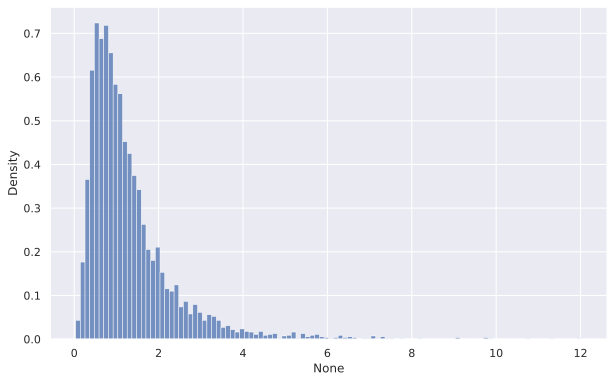

In [14]:
rel_dev = deviations_df['s1'] / deviations_df['s2']
sns.histplot(x=rel_dev, stat='density')

Перед нами распределение Фишера, узнать параметры которого можно с помощью все того же метода **fit()**:

In [15]:
dfn, dfd, loc, scale = stats.f.fit(rel_dev, fdfn=10, fdfd=10)
print(f'dfn = {dfn}, dfd = {dfd}, loc2 = {loc2:<8.4}, scale1 = {scale2:.3}')

dfn = 10, dfd = 10, loc2 = -0.08352, scale1 = 0.231


(0.0, 8.0)

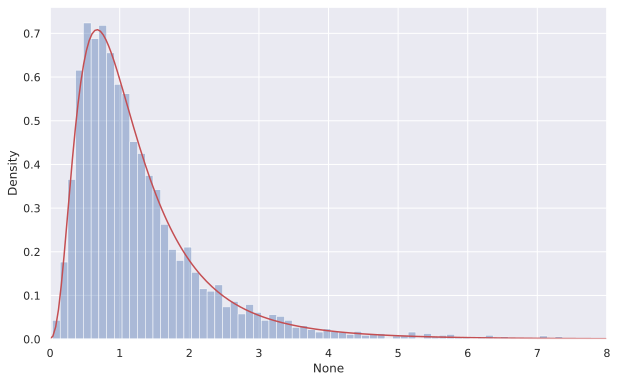

In [16]:
fig, ax = plt.subplots()
rel_dev = deviations_df['s1'] / deviations_df['s2']
sns.histplot(x=rel_dev, stat='density', alpha=0.4)

f_rv = stats.f(dfn, dfd, loc, scale)
x = np.linspace(0, 12, 300)
ax.plot(x, f_rv.pdf(x), color='r')
ax.set_xlim(0, 8)

Если из первой генеральной совокупности была извлечена выборка с дисперсией равной 3, а из второй совокупности выборка с дисперсией равной 1, то получить случайным образом две такие выборки будет крайне трудно:

Text(0.5, 0, 's')

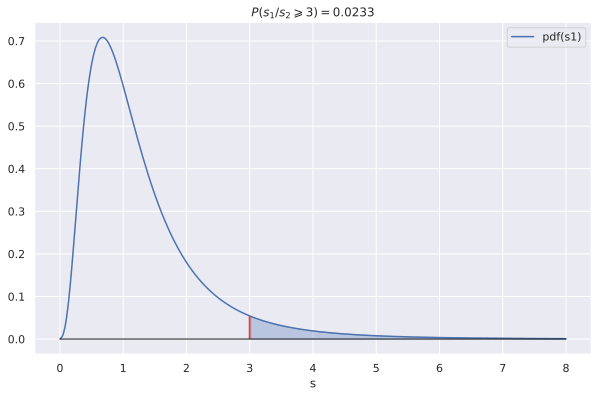

In [17]:
fig, ax = plt.subplots()

rel_var = 3
x = np.linspace(0, 8, 300)

sns.lineplot(x=x, y=f_rv.pdf(x), label='pdf(s1)', ax=ax)
ax.vlines(rel_var, 0, f_rv.pdf(rel_var), color='r', lw=2)
ax.fill_between(x[x>rel_var], f_rv.pdf(x[x>rel_var]),
                np.zeros(len(x[x>rel_var])), alpha=0.3, color='b')
ax.hlines(0, x.min(), x.max(), lw=1, color='k')

p = f_rv.sf(var)
ax.set_title(f'$P(s_{1}/s_{2} \geqslant  {rel_var}) = $' + '{:.3}'.format(p))
ax.set_xlabel('s')

То есть, если мы будем попарно извлекать две выборки по 10 элементов в каждой из двух генеральных совокупностей с распределениями *N*(5, 1.5^2) и *N*(3, 1.5^2), то вероятность того, что отношение дисперсий этих выборок окажется равным или большим 3, составит всего 0.023.

Отношение выборочных дисперсий в нашем примере равно:

In [18]:
np.var(x1, ddof=1) / np.var(x2, ddof=1)

1.083553459313125

Давайте воспользуемся функцией **f_oneway()** и посмотрим на результат (чем меньше значение pvalue, тем меньше вероятность того, что средние генеральных совокупностей равны):

In [19]:
stats.f_oneway(x1, x2)

F_onewayResult(statistic=10.786061383971454, pvalue=0.0041224402038065235)

На самом деле принцип работы выполненного выше теста чрезвычайно прост, и мы можем легко воспроизвести работу функции f_oneway(), для чего нам понадобятся всего две формулы:

a14ab89770dbd3b8654fcc5812deb917.svg

49a7d59cb4dfcd0dee5935dfdfb7beae.svg

In [20]:
m1, m2, m = *np.mean((x1, x2), axis=1), np.mean((x1, x2))

ms_bg = (10*(m1 - m)**2 + 10*(m2 - m)**2)/(2 - 1)
ms_wg = (np.sum((x1 - m1)**2) + np.sum((x2 - m2)**2))/(20 - 2)
s = ms_bg/ms_wg
p = stats.f.sf(s, dfn=1, dfd=18)
print(f'statistic = {s:.5}, p-value = {p:.5}')

statistic = 10.786, p-value = 0.0041224


*MS_bg* (mean square between group) просто показывает, как среднее каждой группы отклоняется от общего среднего. Очевидно, что чем меньше средние групп отличаются друг от друга, тем меньше значение *MS_bg*. С другой стороны *MS_wg* (mean square within group) показывает, что если средние групп не слишком сильно отличаются друг от друга, то внутригрупповая дисперсия практически не будет отличаться от общегрупповой.

В поддержку утверждения того, что это действительно дисперсии говорит и тот факт, что отношение *MS_bg* к *MS_wg* имеет распределение Фишера:

5f141a10c91789a634d76d368c7af010.svg

В чем довольно легко убедиться:

Text(0.5, 1.0, 'Распределение $MS_{bg} \\; / \\;MS_{wg}$ стандартизированных случайных значений')

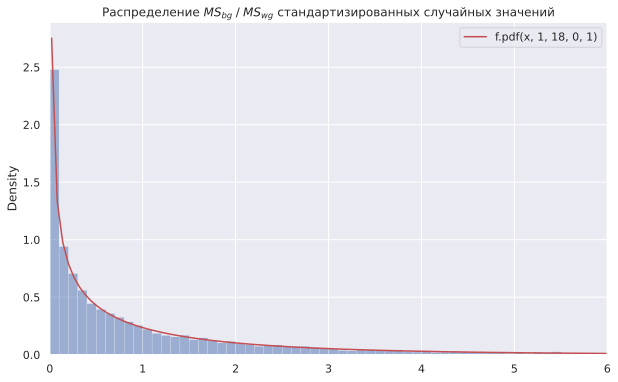

In [21]:
N = 10000
samples_1 = stats.norm.rvs(loc=0, scale=1, size=(N, 10))
samples_2 = stats.norm.rvs(loc=0, scale=1, size=(N, 10))

m1 = samples_1.mean(axis=1)
m2 = samples_2.mean(axis=1)
m = np.hstack((samples_1, samples_2)).mean(axis=1)

ms_bg = 10*((m1 - m)**2 + (m2 - m)**2)
ss_1 = np.sum((samples_1 - m1.reshape(N, 1))**2, axis=1)
ss_2 = np.sum((samples_2 - m2.reshape(N, 1))**2, axis=1)
ms_wg = (ss_1 + ss_2)/18

statistics = ms_bg/ms_wg

f, ax = plt.subplots()
x = np.linspace(0.02, 30, 500)
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=18), color='r', label=f'f.pdf(x, 1, 18, 0, 1)')
plt.legend()
sns.histplot(x=statistics, binwidth=0.1, stat='density', alpha=0.5)
ax.set_xlim(0, 6)
ax.set_title(r'Распределение $MS_{bg} \; / \;MS_{wg}$ стандартизированных случайных значений')

Text(0.5, 1.0, 'Распределение $MS_{bg} \\; / \\;MS_{wg}$ нестандартизированных случайных значений')

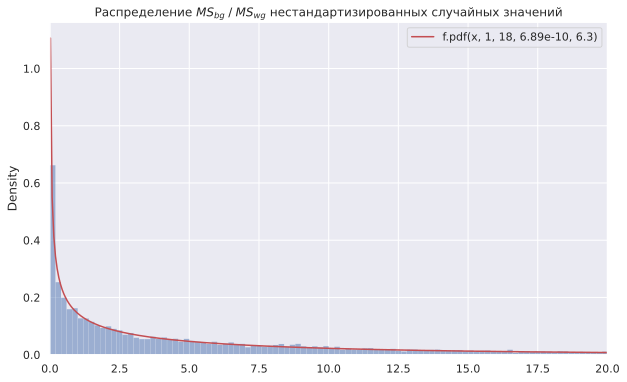

In [22]:
N = 10000
mu_1 = stats.uniform.rvs(loc=0, scale=5, size=(N, 1))
samples_1 = stats.norm.rvs(loc=mu_1, scale=2, size=(N, 10))
mu_2 = stats.uniform.rvs(loc=0, scale=5, size=(N, 1))
samples_2 = stats.norm.rvs(loc=mu_2, scale=2, size=(N, 10))

m1 = samples_1.mean(axis=1)
m2 = samples_2.mean(axis=1)
m = np.hstack((samples_1, samples_2)).mean(axis=1)

ms_bg = 10*((m1 - m)**2 + (m2 - m)**2)
ss_1 = np.sum((samples_1 - m1.reshape(N, 1))**2, axis=1)
ss_2 = np.sum((samples_2 - m2.reshape(N, 1))**2, axis=1)
ms_wg = (ss_1 + ss_2)/18

statistics = ms_bg/ms_wg

loc, scale = stats.f.fit(statistics, fdfn=1, fdfd=18)[-2:]

f, ax = plt.subplots()
x = np.linspace(0.02, 30, 500)
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=18, loc=loc, scale=scale), color='r', label=f'f.pdf(x, 1, 18, {loc:.3}, {scale:.3})')
plt.legend()
sns.histplot(x=statistics, binwidth=0.2, stat='density', alpha=0.5)
ax.set_xlim(0, 20)
ax.set_title(r'Распределение $MS_{bg} \; / \;MS_{wg}$ нестандартизированных случайных значений')

Вы можете попробовать воспроизвести работу теста Левене, который реализован в SciPy как функция **levene()**. Этот тест (критерий) устроен точно так же, как однофакторный ANOVA, но проверяет гипотезу о равенстве дисперсий генеральных совокупностей:

In [23]:
stats.levene(x1, x2)

LeveneResult(statistic=0.0047521397921121405, pvalue=0.9458007897725039)

Тот факт, что центральная предельная теорема работает только для выборочного среднего, но не для выборочной дисперсии, очень легко продемонстрировать на следующем примере: сгенерируем 10000 выборок по 5 элементов в каждой из стандартных нормального, равномерного и лапласова распределений, а затем сравним, как будут распределены суммы квадратов элементов каждой выборки:

(0.0, 20.0)

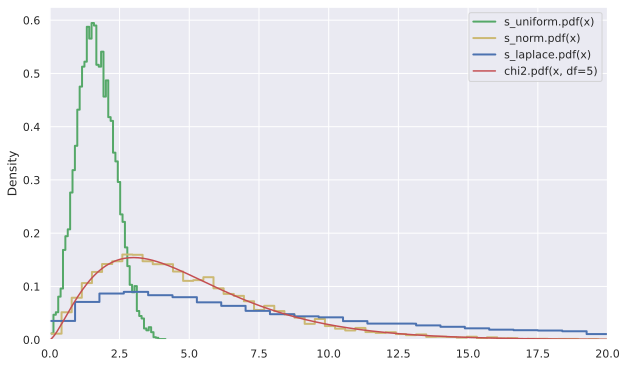

In [24]:
N, k = 10000, 5
func = [stats.uniform, stats.norm, stats.laplace]
color = list('gyb')
labels = ['s_uniform', 's_norm', 's_laplace']

for i in range(3):
    ss = np.square(func[i].rvs(size=(N, k))).sum(axis=1)
    sns.histplot(x=ss, stat='density', label=labels[i] + '.pdf(x)',
                 element='step', color=color[i], lw=2, fill=False)
x = np.linspace(0, 25, 300)
plt.plot(x, stats.chi2.pdf(x, df=5), color='r', label='chi2.pdf(x, df=5)')
plt.legend()
plt.xlim(0, 20)

Допустим, у нас есть вот такая выборка:

In [ ]:
array([0.40572556, 0.67443266, 0.38765587, 0.96540199, 0.57933085])

Давайте сгенерируем 50 тысяч выборок из нормального распределения по 5 элементов в каждой, отсортируем элементы в каждой выборке по возрастанию, а затем посмотрим, как распределены элементы в зависимости от индекса:

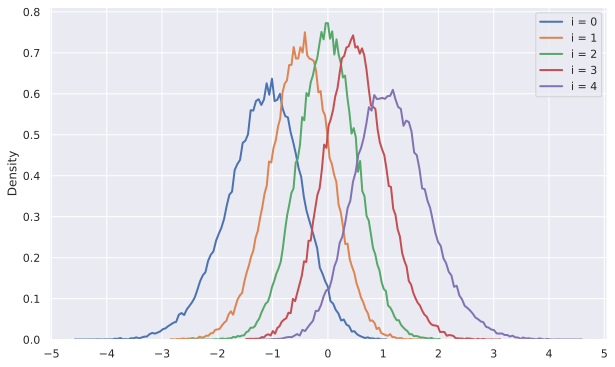

In [26]:
s = np.sort(stats.norm.rvs(size=(50000, 5)), axis=1).T
for i in range(5):
    sns.histplot(x=s[i], stat='density',
                 label='i = ' + str(i),
                 element='poly', lw=2, fill=False)
plt.xticks(np.arange(-5, 6))
plt.legend()

Мы могли бы сделать следующее:

* "на глазок" прикинуть тип распределения;

* подобрать параметры с помощью метода максимального правдоподобия;

* рассчитать вероятность совместного отклонения элементов выборки от вершины каждого распределения (рассчитать статистику);

* провести какое-то количество экспериментов, чтобы посмотреть как распределена плотность рассчитанной в предыдущем пункте вероятности (построить распределение статистики);

* определить критическую область.

Мы можем даже визуально прикинуть вероятность того, что какая-то выборка принадлежит нормальному распределению:

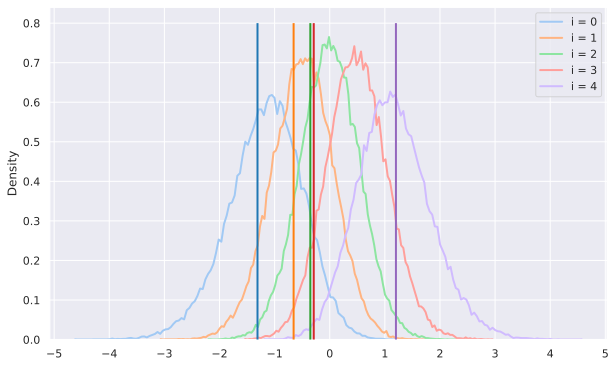

In [27]:
s = np.sort(stats.norm.rvs(size=(50000, 5)), axis=1).T
sample = np.sort(stats.norm.rvs(size=5))
colors = sns.color_palette('tab10', 5)
for i in range(5):
    sns.histplot(x=s[i], stat='density',
                 label='i = ' + str(i),
                 element='poly', lw=2, fill=False,
                 color=sns.color_palette('pastel', 5)[i])

    plt.vlines(sample[i], 0, 0.8, lw=2,  zorder=10,
               color=sns.color_palette('tab10', 5)[i])

plt.xticks(np.arange(-5, 6))
plt.legend()

Или что какая-то выборка вряд ли принадлежит нормальному распределению:

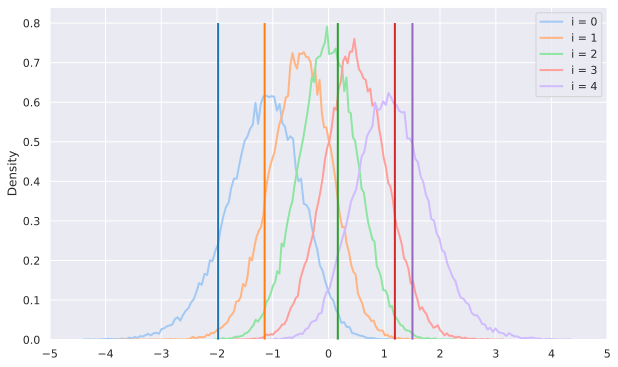

In [28]:
s = np.sort(stats.norm.rvs(size=(50000, 5)), axis=1).T
sample = np.sort(stats.uniform.rvs(loc=-2, scale=4, size=5))
colors = sns.color_palette('tab10', 5)
for i in range(5):
    sns.histplot(x=s[i], stat='density',
                 label='i = ' + str(i),
                 element='poly', lw=2, fill=False,
                 color=sns.color_palette('pastel', 5)[i])

    plt.vlines(sample[i], 0, 0.8, lw=2,  zorder=10,
               color=sns.color_palette('tab10', 5)[i])

plt.xticks(np.arange(-5, 6))
plt.legend()

В качестве простого примера мы можем рассмотреть критерий Колмогорова:

In [29]:
stats.ks_1samp(x1, stats.norm.cdf, args=(5, 1.5))

KstestResult(statistic=0.11452966409855592, pvalue=0.9971279018404035, statistic_location=5.85, statistic_sign=-1)

Для начала нам нужно вычислить эмпирические функции распределения вероятности и одну теоретическую, ту, с которой будет происходить сравнение:

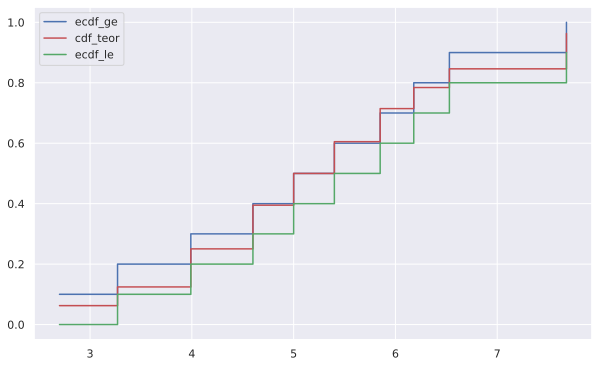

In [30]:
x1.sort()
n = len(x1)
ecdf_ge = np.r_[1:n+1]/n
ecdf_le = np.r_[0:n]/n
cdf_teor = stats.norm.cdf(x1, loc=5, scale=1.5)

plt.plot(x1, ecdf_ge, color='b', drawstyle='steps-post', label='ecdf_ge')
plt.plot(x1, cdf_teor, color='r', drawstyle='steps-post', label='cdf_teor')
plt.plot(x1, ecdf_le, color='g', drawstyle='steps-post', label='ecdf_le')
plt.legend()

Статистикой в данном критерии является максимальная попарная разность между значениями эмпирических функций и теоретической, т.е. максимальная разность между красными и синими ступеньками или красными и зелеными ступеньками:

In [31]:
d_plus = ecdf_ge - cdf_teor
d_minus = cdf_teor - ecdf_le
statistic = np.max([d_plus, d_minus])
statistic

0.11452966409855592

Данная статистика имеет вот такое распределение плотности вероятности (попробуйте построить график при n=5):

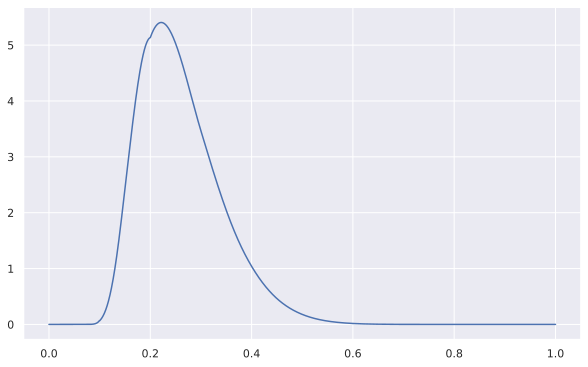

In [34]:
x = np.linspace(0, 1, 3000)
plt.plot(x, stats.kstwo.pdf(x, n))

Благодаря которому мы можем вычислить значение p-value:

In [35]:
pvalue = stats.kstwo.sf(statistic, n)
pvalue

0.9971279018404035

Не очень понятно, что из себя пердставляет **ecdf_le** (есть только смутные представления). А то, что **ecdf_le** вообще должна присутствовать в вычислениях, удалось понять только после просмотра исходников.

